# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

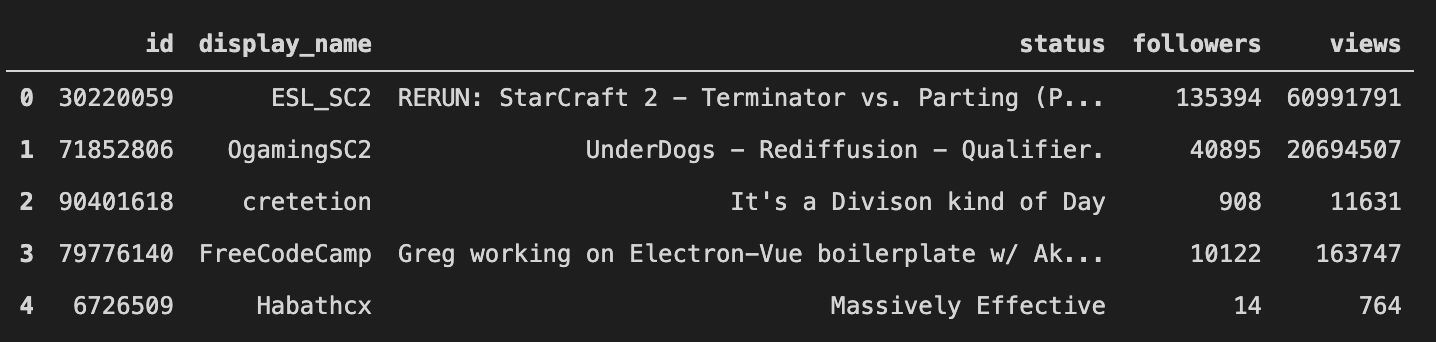

In [ ]:
#import basic packages
import numpy as np
import pandas as pd

#import API packages
import requests
import json

In [ ]:
channels = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"
]
channels_list = []

for channel in channels:
    JSONContent = requests.get("https://wind-bow.glitch.me/twitch-api/channels/" + channel).json()

    if 'error' not in JSONContent:
      channels_list.append({
        'id': JSONContent['_id'], 
        'display_name': JSONContent['display_name'], 
        'status': JSONContent['status'],
        'followers': JSONContent['followers'], 
        'views': JSONContent['views']
    })


In [ ]:
print(channels_list)

In [ ]:
twitch = pd.DataFrame(channels_list)
twitch.head()

# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [47]:
#Load packages
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [48]:
#Identify country codes for the locales I'll analyze
#"us": "United States of America", "ca": "Canada", "gb": "Great Britain", "ie": "Ireland", "nz": "New Zealand",  "au": "Australia"
#app IDs: "candycrush": , "tinder":"", "facebook":"", "twitter":""

In [ ]:
""""candy-crush-saga" : "id553834731"
"tinder-dating-new-people": "id547702041"
"facebook": "id284882215"
"twitter" : "id333903271" """

In [ ]:
""""reference info
APP_ID = ["id553834731","id547702041","id284882215","id553834731"]
APP_LIST = ["candy-crush-saga","tinder-dating-new-people", "facebook", "twitter"]
COUNTRY_CODE = ['au','ca','gb','ie','nz','us']
COUNTRY_LIST (english speaking)= ['Australia','Canada','Great Britain','Ireland','New Zealand','United States of America']
PAGE_LIST = [1,2]
VERSION = []
RATINGS = []
REVIEW = []
BASE_URL = ('https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json')

app_info = []"""

In [51]:
req = requests.get('https://itunes.apple.com/gb/rss/customerreviews/id=id553834731/page=2/sortby=mostrecent/json')
data = req.json().get('feed')
data

{'author': {'name': {'label': 'iTunes Store'},
  'uri': {'label': 'http://www.apple.com/uk/itunes/'}},
 'icon': {'label': 'http://itunes.apple.com/favicon.ico'},
 'id': {'label': 'https://mzstoreservices-int-st.itunes.apple.com/gb/rss/customerreviews/id=id553834731/page=2/sortby=mostrecent/json'},
 'link': [{'attributes': {'href': 'https://music.apple.com/WebObjects/MZStore.woa/wa/viewGrouping?cc=gb&id=130',
    'rel': 'alternate',
    'type': 'text/html'}},
  {'attributes': {'href': 'https://mzstoreservices-int-st.itunes.apple.com/gb/rss/customerreviews/id=id553834731/page=2/sortby=mostrecent/json',
    'rel': 'self'}},
  {'attributes': {'href': '', 'rel': 'first'}},
  {'attributes': {'href': '', 'rel': 'last'}},
  {'attributes': {'href': '', 'rel': 'previous'}},
  {'attributes': {'href': '', 'rel': 'next'}}],
 'rights': {'label': 'Copyright 2008 Apple Inc.'},
 'title': {'label': 'iTunes Store: Customer Reviews'},
 'updated': {'label': '2021-05-25T08:10:09-07:00'}}

In [52]:
def get_country_reviews(
    appID,
    country='us',
    page=1,
    df = pd.DataFrame()):
    url = 'https://itunes.apple.com/' + country \
          + '/rss/customerreviews/id=%s/page=%d/sortby=mostrecent/json' \
          % (appID, page)
    req = requests.get(url)
    try:
      data = req.json().get('feed')
      page_error = False
    except ValueError:
      return df.reset_index(drop=True)
    try:
      df_index = np.arange(len(data.get('entry')))
    except:
      return df.reset_index(drop=True)
    
    csvTitles = ['title', 'version', 'rating', 'review', 'vote_count']
    page_df = pd.DataFrame(index=df_index, columns=csvTitles)
    entry_index = -1  # DataFrame Index
    
    for entry in data.get('entry'):
      if entry.get('im:name'):
          continue
      entry_index += 1
      page_df.title.loc[entry_index] = entry.get('title').get('label')
      page_df.version.loc[entry_index] = entry.get('im:version').get('label')
      page_df.rating.loc[entry_index] = entry.get('im:rating').get('label')
      page_df.review.loc[entry_index] = entry.get('content').get('label')
      page_df.vote_count.loc[entry_index] = entry.get('im:voteCount').get('label')
  
  # Clean up returned values
      page_df.dropna(axis=0, how='all', inplace=True)
      page_df.fillna({'title' : '', 'review' : '', 'version': ''})
      page_df.rating = pd.to_numeric(page_df.rating, 
                                  downcast='unsigned', 
                                  errors='coerce')
      page_df.vote_count = pd.to_numeric(page_df.vote_count, 
                                      downcast='unsigned', 
                                      errors='coerce')
  
    if not page_error:
      return get_country_reviews(
          appID,
          country=country,
          page=page + 1,
          df=df.append(page_df).reset_index(drop=True))

def get_reviews(
    appID,
    list_countries=list(['au','ca','gb','ie','nz','us'])):
    df = pd.DataFrame()

    for country in list_countries:
        df=df.append(
            get_country_reviews(appID, country=country)
            ).reset_index(drop=True)
    return df



Candycrush

In [ ]:
df= get_reviews(553834731)
df

,title,version,rating,review,vote_count
0,Candy Crush Saga,1.202.0.2,5,I love playing any Candy Crush games even thou...,0
1,Disgustingly rigged to try make you spend mone...,1.198.0,1,So obvious how disgustingly rigged the game is...,0
2,Candy crush,1.194.0.2,3,Very annoying when unable to close an ad to re...,0
3,Can’t play anymore,1.186.0.3,1,"Got up to level 4641, and was enjoying these h...",0
4,No way to win,1.180.0.1,1,Literally puts levels in that you cannot win w...,0
5,Thank you,1.175.0.4,5,I have spent many hours playing this game and ...,0
6,Back to my own levels playing on Facebook,1.171.0.1,5,to whom it may concern\nVery disappointed..bee...,0
7,Annoyed,1.166.0.4,3,I’ve been playing candy crush for well over a ...,0
8,Candy,1.163.0,5,Great game lots to keep you interested,0
9,Game,1.158.1,5,Good and challenging game with many levels to ...,0


In [ ]:
#for visualisation
df.dtypes

title         object
version       object
rating         uint8
review        object
vote_count     uint8
               ...  
would          int64
you            int64
à              int64
👍              int64
👍🏻             int64
Length: 121, dtype: object

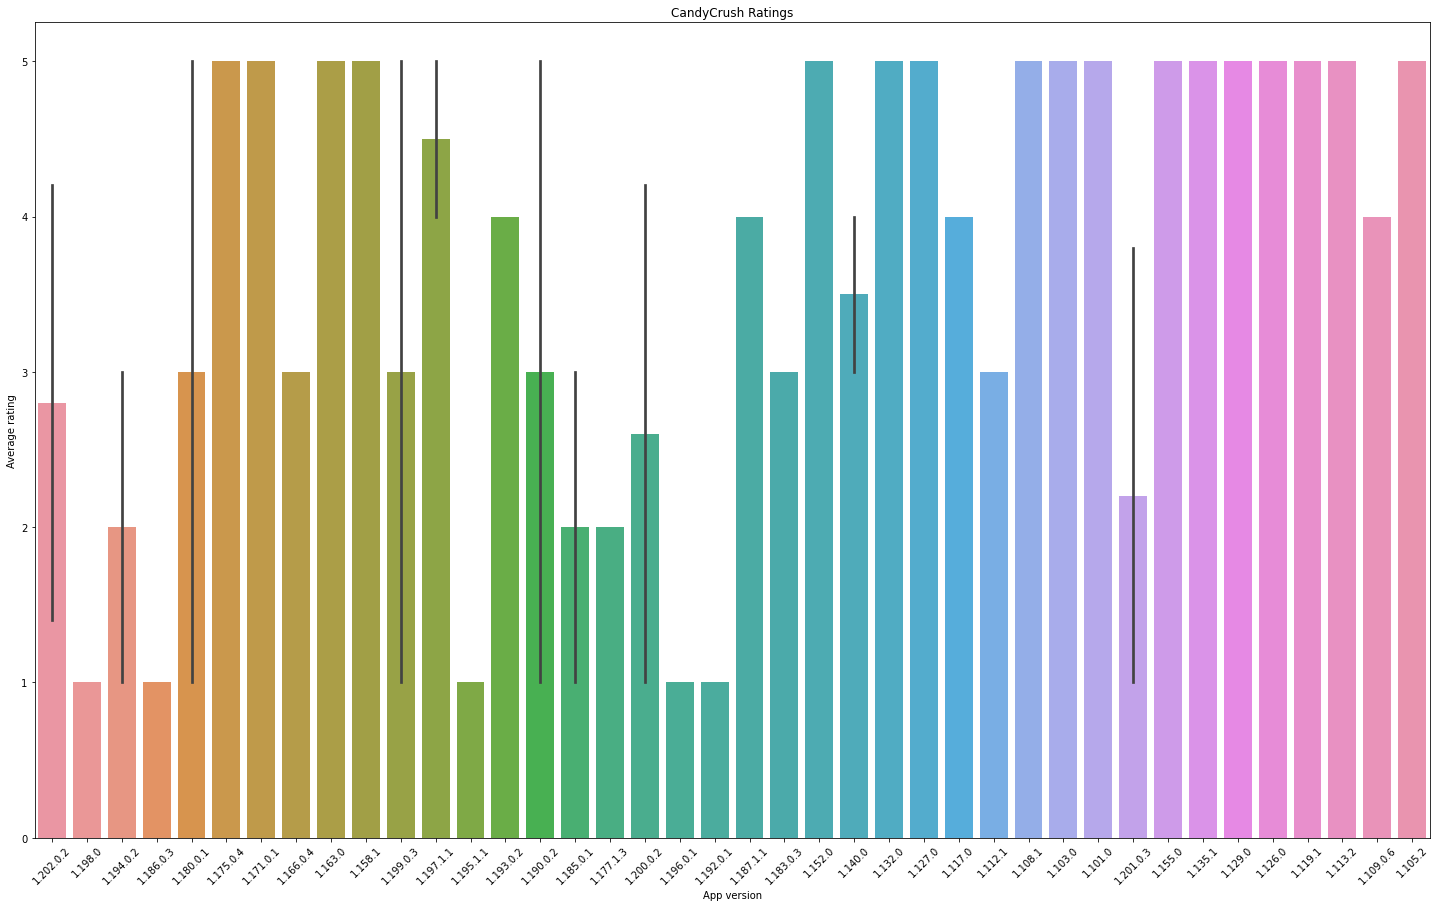

In [ ]:
#rating visualisation
rating_sum = df.rating.value_counts()

plt.figure(figsize=(25,15))
sns.barplot(x=df.version, y = df.rating)

plt.xticks(rotation = 45)
plt.xlabel('App version')
plt.ylabel('Average rating')
plt.title('CandyCrush Ratings')
plt.show()

In [ ]:
#Highest rated versions of candycrush
df.groupby(['version']).rating.mean().sort_values(ascending=False)


version
1.101.0      5.0
1.152.0      5.0
1.158.1      5.0
1.163.0      5.0
1.171.0.1    5.0
1.175.0.4    5.0
1.135.1      5.0
1.132.0      5.0
1.129.0      5.0
1.127.0      5.0
1.126.0      5.0
1.155.0      5.0
1.119.1      5.0
1.113.2      5.0
1.108.1      5.0
1.105.2      5.0
1.103.0      5.0
1.197.1.1    4.5
1.117.0      4.0
1.193.0.2    4.0
1.109.0.6    4.0
1.187.1.1    4.0
1.140.0      3.5
1.112.1      3.0
1.166.0.4    3.0
1.180.0.1    3.0
1.183.0.3    3.0
1.190.0.2    3.0
1.199.0.3    3.0
1.202.0.2    2.8
1.200.0.2    2.6
1.201.0.3    2.2
1.177.1.3    2.0
1.185.0.1    2.0
1.194.0.2    2.0
1.186.0.3    1.0
1.192.0.1    1.0
1.195.1.1    1.0
1.196.0.1    1.0
1.198.0      1.0
Name: rating, dtype: float64

In [ ]:
#The following versions get 5.0 on average - usually a sign
#that the app keeps getting new users who haven't had time to
#prefer previous versions or get used to its glitches
"""
1.101.0      5.0
1.152.0      5.0
1.158.1      5.0
1.163.0      5.0
1.171.0.1    5.0
1.175.0.4    5.0
1.135.1      5.0
1.132.0      5.0
1.129.0      5.0
1.127.0      5.0
1.126.0      5.0
1.155.0      5.0
1.119.1      5.0
1.113.2      5.0
1.108.1      5.0
1.105.2      5.0
1.103.0      5.0"""

'\n1.101.0      5.0\n1.152.0      5.0\n1.158.1      5.0\n1.163.0      5.0\n1.171.0.1    5.0\n1.175.0.4    5.0\n1.135.1      5.0\n1.132.0      5.0\n1.129.0      5.0\n1.127.0      5.0\n1.126.0      5.0\n1.155.0      5.0\n1.119.1      5.0\n1.113.2      5.0\n1.108.1      5.0\n1.105.2      5.0\n1.103.0      5.0'

In [ ]:
words = df.title.str.get_dummies(' ')
df = df.join(words, rsuffix='word_')
df.head(3)

,title,version,rating,review,vote_count,10,1210,5,ADDICTIVE!,Addictive,Annoyed,Awesome,Back,Bank,Best,Bug,Candy,Can’t,Classic,Cool,Crush,Dernière,Disgustingly,Doesn’t,Facebook,Fun,Game,Gg,Glitches,Glitchy,Good,Great,How,I,It’s,I’d,Latest,Level,Love,No,...,less,level,levels,make,mean.,mise,money,more,move,my,next,off,ok,on,own,pig,play,playing,rigged,saga,small,spend,stars,tech,the,then,this,to,try,turn,until,update,volume,way,win,would,you,à,👍,👍🏻
0,Candy Crush Saga,1.202.0.2,5,I love playing any Candy Crush games even thou...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Disgustingly rigged to try make you spend mone...,1.198.0,1,So obvious how disgustingly rigged the game is...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
2,Candy crush,1.194.0.2,3,Very annoying when unable to close an ad to re...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
(df.loc[df.rating == 5, 
        list(df.columns)[5:]]
 .sum(axis=0)
 .sort_values(ascending=False))

Candy     5
crush     4
candy     2
Game      2
10        1
         ..
jour      0
less      0
level     0
make      0
could!    0
Length: 116, dtype: int64

Tinder

In [71]:
df= get_reviews(547702041)
df

,title,version,rating,review,vote_count
0,Poor app performance,12.8.0,1,Holy moly you guys have a lot of resources lea...,0
1,where do i start,12.6.0,1,cons\n- you get banned for no reason and then ...,0
2,"Poor quality app, money hungry, don’t actually...",12.5.0,1,Obviously pushes to show you people who are cl...,0
3,Don’t bother,12.3.0,1,This is does not work and support will not hel...,0
4,Crashes every time I open,12.1.0,2,The more matches I get the more glitchy the ap...,0
5,Hacked and ignored,11.31.0,2,My account had been hacked and presumably my b...,0
6,Banned account,11.30.0,1,They banned my account for no reason so I emai...,2
7,Free version is better,11.29.0,1,The app is better value if you don’t pay for i...,0
8,Refund,11.28.0,1,I have purchased a 6 month subscribe version i...,0
9,This app is useless for 90% of guys,11.27.0,2,All this app does is fuel women’s ego’s most o...,0


In [72]:
#for visualisation
df.dtypes

title         object
version       object
rating         uint8
review        object
vote_count     uint8
dtype: object

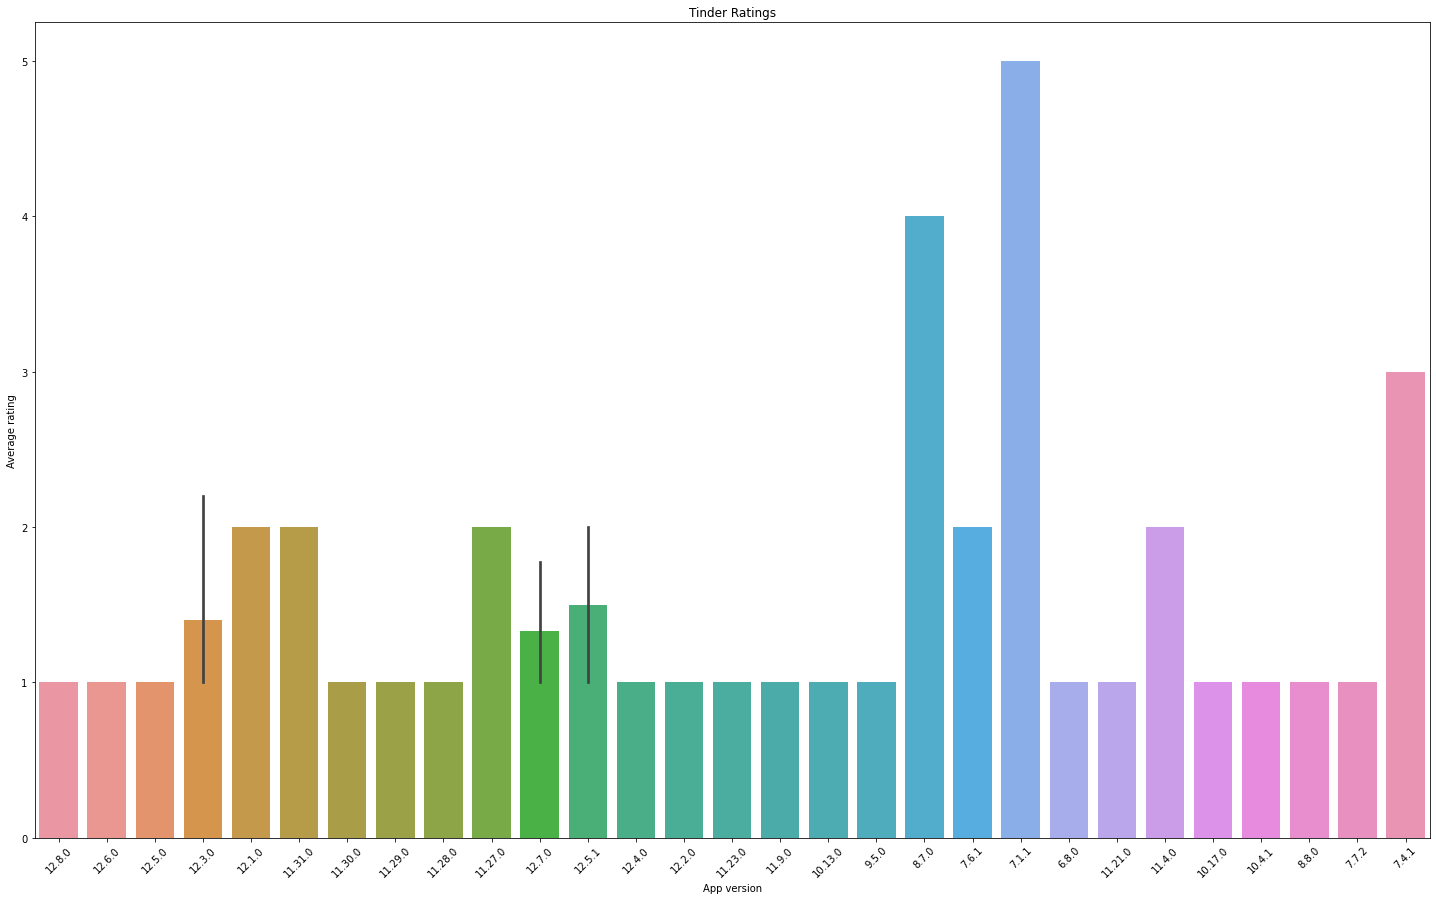

In [73]:
#rating visualisation
rating_sum = df.rating.value_counts()

plt.figure(figsize=(25,15))
sns.barplot(x=df.version, y = df.rating)

plt.xticks(rotation = 45)
plt.xlabel('App version')
plt.ylabel('Average rating')
plt.title('Tinder Ratings')
plt.show()

In [74]:
#Highest rated versions of tinder
df.groupby(['version']).rating.mean().sort_values(ascending=False)
#That's pretty ugly....just une version gets a 5

version
7.1.1      5.000000
8.7.0      4.000000
7.4.1      3.000000
11.31.0    2.000000
11.4.0     2.000000
12.1.0     2.000000
7.6.1      2.000000
11.27.0    2.000000
12.5.1     1.500000
12.3.0     1.400000
12.7.0     1.333333
11.23.0    1.000000
11.21.0    1.000000
10.4.1     1.000000
11.28.0    1.000000
11.29.0    1.000000
11.30.0    1.000000
10.17.0    1.000000
9.5.0      1.000000
11.9.0     1.000000
12.2.0     1.000000
8.8.0      1.000000
12.4.0     1.000000
12.5.0     1.000000
12.6.0     1.000000
12.8.0     1.000000
6.8.0      1.000000
7.7.2      1.000000
10.13.0    1.000000
Name: rating, dtype: float64

In [75]:
words = df.title.str.get_dummies(' ')
df = df.join(words, rsuffix='word_')
df.head(5)

,title,version,rating,review,vote_count,$,'Super,(A:40303),"0,25$",90%,A,APPS,Always,Annoying,Any,BETTER,Bad,Ban,Banned,Broken,Buggy,Buggy?,Can’t,Crashes,Don’t,Error,Expanding,Fake,Free,Glitchy,Got,Hacked,Halved,Horrible,I,Is,Just,Last,Likes',New,...,new,no,not,nothing,of,on,once,open,people,performance,please,problem,problems,quality,range,reason,review...,ruined,slow,so,start,suckers,swipe,team,the,there,they,time,to,updates,used,useless,versionword_,way,where,will,with,working,worth,wrong
0,Poor app performance,12.8.0,1,Holy moly you guys have a lot of resources lea...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,where do i start,12.6.0,1,cons\n- you get banned for no reason and then ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,"Poor quality app, money hungry, don’t actually...",12.5.0,1,Obviously pushes to show you people who are cl...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Don’t bother,12.3.0,1,This is does not work and support will not hel...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Crashes every time I open,12.1.0,2,The more matches I get the more glitchy the ap...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
(df.loc[df.rating == 5, 
        list(df.columns)[5:]]
 .sum(axis=0)
 .sort_values(ascending=False))
#somewhat negative

A          1
wrong      0
Social     0
Very       0
Tinder     0
          ..
haven’t    0
have       0
has        0
guys       0
$          0
Length: 162, dtype: int64

Facebook

In [77]:
df= get_reviews(284882215)
df
#the world's most loved and used app, right? ; >

,title,version,rating,review,vote_count
0,Let the world know who is the real terrorist,319.0,1,#save_Palestine#,0
1,Trash!,319.0,1,This trash need to be gone. Big tech greed no ...,0
2,Facebook,319.0,1,"Worst app ever, deleting forever",0
3,Bias controlling platform,319.0,1,Facebook platform has clearly shown its bias s...,0
4,They support genocide,319.0,1,"Working with zionists, what a shame",0
5,Biased censorship,319.0,1,Fb controls the flow of information by politic...,0
6,FREE PALESTINE,319.0,1,Stop the silencing and censorship of Palestini...,0
7,Biased content and app,319.0,1,Mostly promotes biased contents not a neutral ...,0
8,biased and racist,319.0,1,biased and racist,0
9,Racist content promoted,319.0,1,Angry with Facebook’s racist approach to the P...,0


In [78]:
#for visualisation
df.dtypes

title         object
version       object
rating         uint8
review        object
vote_count     uint8
dtype: object

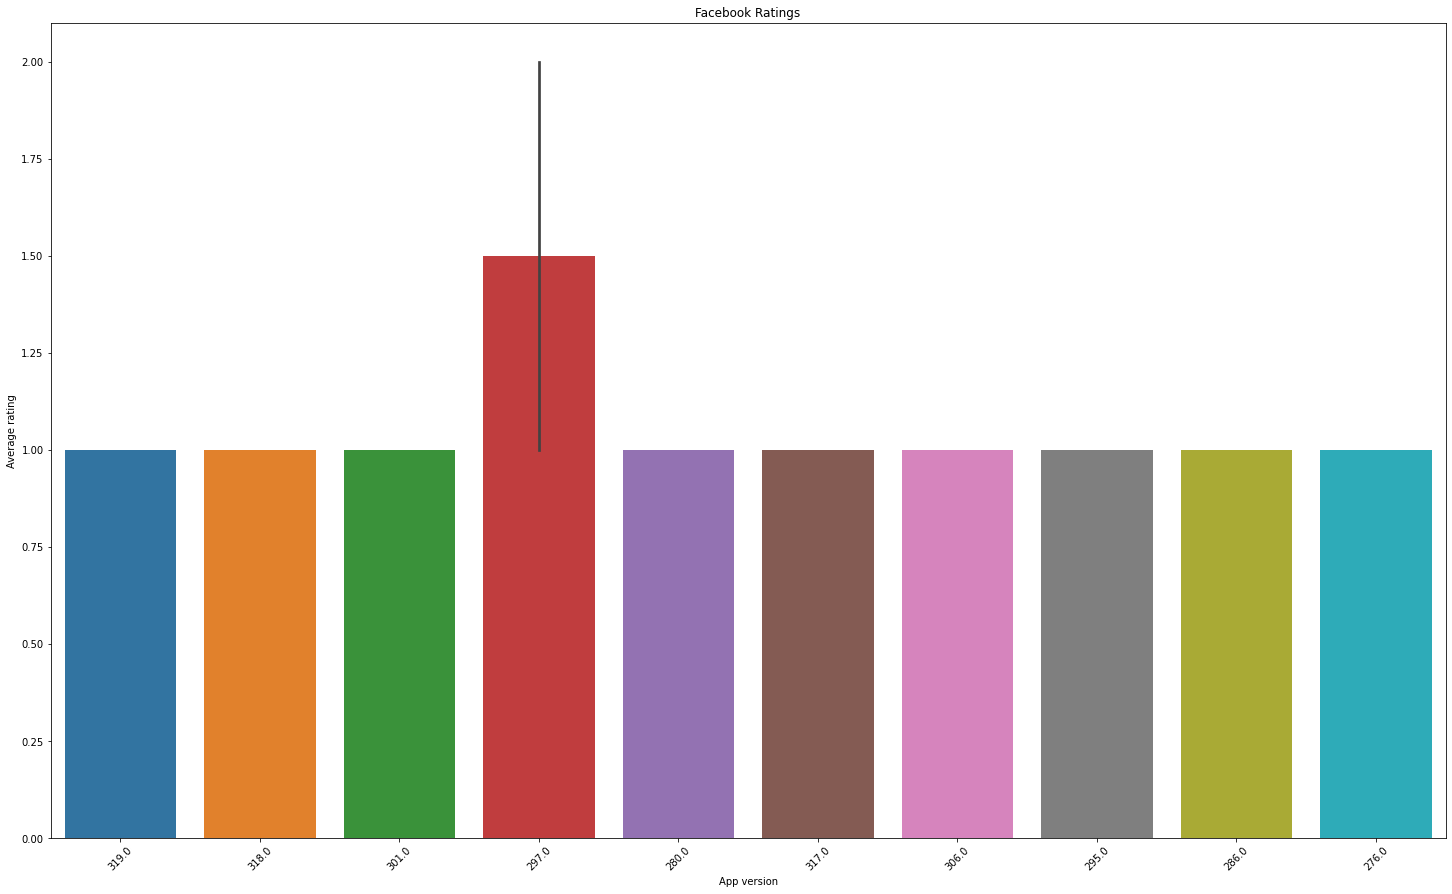

In [79]:
#rating visualisation
rating_sum = df.rating.value_counts()

plt.figure(figsize=(25,15))
sns.barplot(x=df.version, y = df.rating)

plt.xticks(rotation = 45)
plt.xlabel('App version')
plt.ylabel('Average rating')
plt.title('Facebook Ratings')
plt.show()

In [80]:
#Highest rated versions of facebook
df.groupby(['version']).rating.mean().sort_values(ascending=False)


version
297.0    1.5
319.0    1.0
318.0    1.0
317.0    1.0
306.0    1.0
301.0    1.0
295.0    1.0
286.0    1.0
280.0    1.0
276.0    1.0
Name: rating, dtype: float64

In [92]:
words = df.title.str.get_dummies(' ')
df = df.join(words, rsuffix='word_')
df.head(3)

,title,version,rating,review,vote_count,10,1210,5,ADDICTIVE!,Addictive,Annoyed,Awesome,Back,Bank,Best,Bug,Candy,Can’t,Classic,Cool,Crush,Dernière,Disgustingly,Doesn’t,Facebook,Fun,Game,Gg,Glitches,Glitchy,Good,Great,How,I,It’s,I’d,Latest,Level,Love,No,...,lessword_,levelword_,levelsword_,makeword_,mean.word_,miseword_,moneyword_,moreword_,moveword_,myword_,nextword_,offword_,okword_,onword_,ownword_,pigword_,playword_,playingword_,riggedword_,sagaword_,smallword_,spendword_,starsword_,techword_,theword_,thenword_,thisword_,toword_,tryword_,turnword_,untilword_,updateword_,volumeword_,wayword_,winword_,wouldword_,youword_,àword_,👍word_,👍🏻word_
0,Candy Crush Saga,1.202.0.2,5,I love playing any Candy Crush games even thou...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Disgustingly rigged to try make you spend mone...,1.198.0,1,So obvious how disgustingly rigged the game is...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
2,Candy crush,1.194.0.2,3,Very annoying when unable to close an ad to re...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
(df.loc[df.rating == 5, 
        list(df.columns)[5:]]
 .sum(axis=0)
 .sort_values(ascending=False))

🇵🇸🇵🇸🇵🇸🇵🇸         0
Nope             0
Notifications    0
No❤️             0
PALESTINE        0
                ..
many             0
me               0
not              0
of               0
.                0
Length: 123, dtype: int64

Twitter

In [94]:
df= get_reviews(333903271)
df

,title,version,rating,review,vote_count
0,Lunatics,8.65.2,1,Individuals who take people down for voicing a...,0
1,Horrendous,8.63.1,1,Since then censorship of opinions and the remo...,0
2,Review,8.60,3,"Since I upgraded my iPhone 6 to 8, I can’t cop...",0
3,Useless without President Trump - no excitement,8.54.5,1,Useless without President Trump - no excitement,0
4,Polity also,8.52.1,1,Cringe,0
5,Can’t do anything not even deactivate my account.,8.48,1,I’ve been trying to figure out how to contact ...,0
6,Scum,8.48,1,FREEDOM OF SPEECH,0
7,No freedom of speech,8.48,1,A platform that doesn’t allow freedom of speec...,1
8,Well done,8.48,5,Delighted you finally banned Trump. He has spr...,3
9,Broken after update,8.47.1,1,The app is rendering information with square b...,0


In [95]:
#for visualisation
df.dtypes

title         object
version       object
rating         uint8
review        object
vote_count     uint8
dtype: object

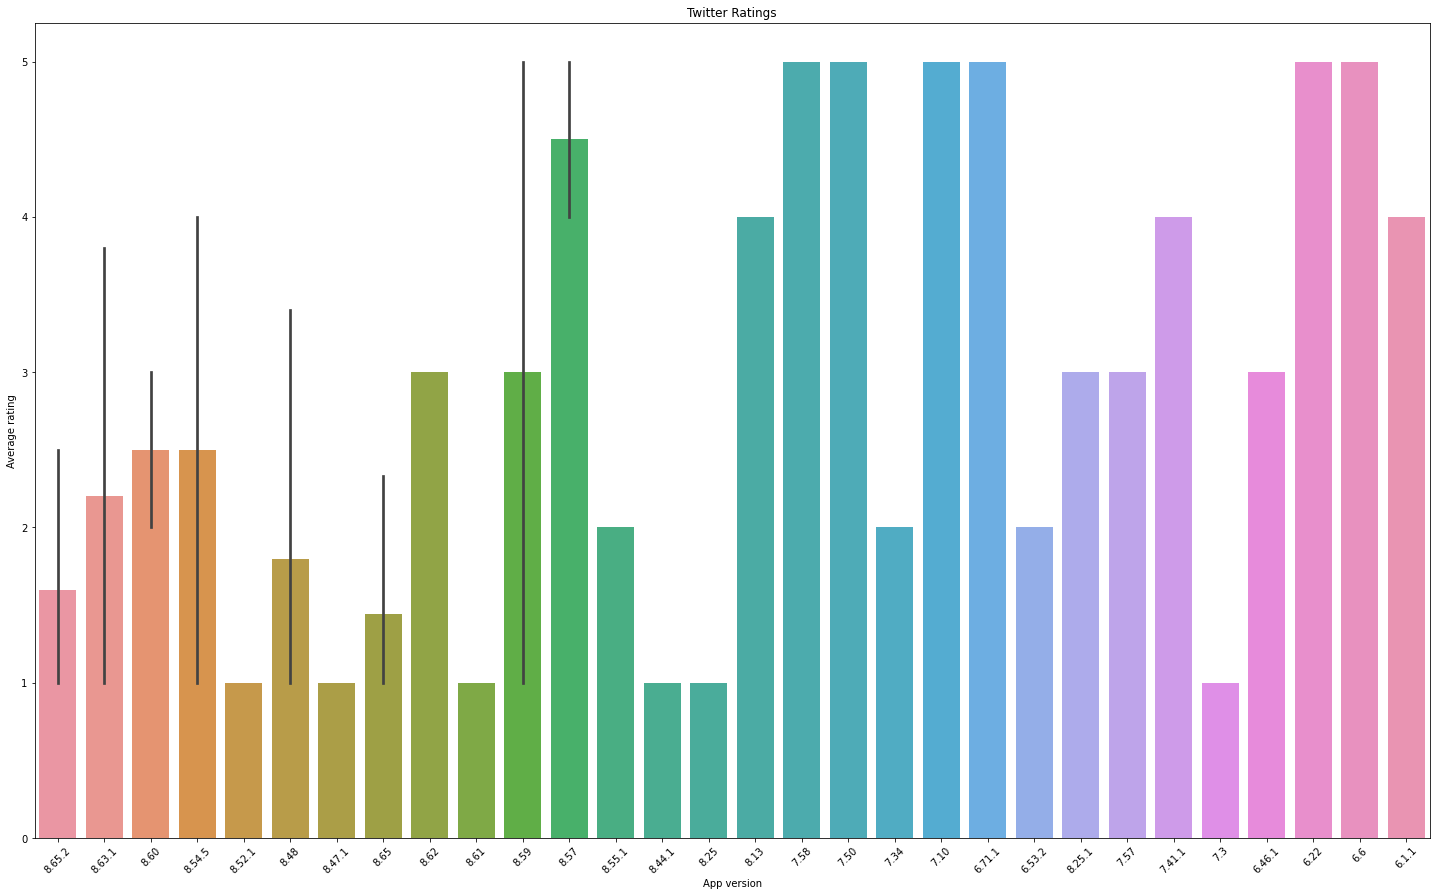

In [96]:
#rating visualisation
rating_sum = df.rating.value_counts()

plt.figure(figsize=(25,15))
sns.barplot(x=df.version, y = df.rating)

plt.xticks(rotation = 45)
plt.xlabel('App version')
plt.ylabel('Average rating')
plt.title('Twitter Ratings')
plt.show()

#twitter's getting the most love with candycrush

In [97]:
#Highest rated versions of twitter
df.groupby(['version']).rating.mean().sort_values(ascending=False)


version
7.58      5.000000
7.10      5.000000
6.71.1    5.000000
6.22      5.000000
6.6       5.000000
7.50      5.000000
8.57      4.500000
8.13      4.000000
6.1.1     4.000000
7.41.1    4.000000
7.57      3.000000
6.46.1    3.000000
8.59      3.000000
8.25.1    3.000000
8.62      3.000000
8.60      2.500000
8.54.5    2.500000
8.63.1    2.200000
7.34      2.000000
6.53.2    2.000000
8.55.1    2.000000
8.48      1.800000
8.65.2    1.600000
8.65      1.444444
7.3       1.000000
8.44.1    1.000000
8.47.1    1.000000
8.52.1    1.000000
8.61      1.000000
8.25      1.000000
Name: rating, dtype: float64

In [98]:
words = df.title.str.get_dummies(' ')
df = df.join(words, rsuffix='word_')
df.head(3)

,title,version,rating,review,vote_count,#انقذوا_حي_الشيخ_جراح,#حي_الشيخ_جراح,-,1,786,Addictive,Against,All,Be,Bias,Broken,Can’t,Careful,Communist,Connected,Connection,Crashes,DMs,Devices,Don’t,For,Ga,Go,Good,Great,Haven,Horrendous,I,IP,Inshallah,Israeli,It’s,Lfc,Liberal,Love,...,problems,racism,refreshing,removing,sensors,spaces,speech,star?,still,story,support,suppressed,supprt,suspended?,team,thanks,that,the,thingy?,till,timeline?????,too,trees,tuned,twitter,update,users.....,violence,vital,voice,war,why,with,without,work,world,you,zaa,zionist,à
0,Lunatics,8.65.2,1,Individuals who take people down for voicing a...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Horrendous,8.63.1,1,Since then censorship of opinions and the remo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Review,8.60,3,"Since I upgraded my iPhone 6 to 8, I can’t cop...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
(df.loc[df.rating == 5, 
        list(df.columns)[5:]]
 .sum(axis=0)
 .sort_values(ascending=False))

Love                     1
done                     1
the                      1
Crashes                  1
Why                      1
                        ..
has                      0
good                     0
glitching                0
garbage!!!!              0
#انقذوا_حي_الشيخ_جراح    0
Length: 164, dtype: int64

# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`